In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

### Data Cleansing and pre processing 

In [3]:
%cd C:\Users\ANIK\Downloads

C:\Users\ANIK\Downloads


In [4]:
#Read csv file with and replacing null values as as "NAN"
house = pd.read_csv("train.csv", na_values="NAN")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

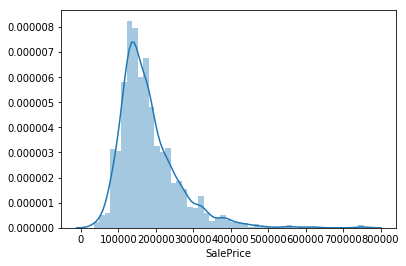

In [6]:
sns.distplot(house['SalePrice'])
#the data of sales price seems a bit skewed

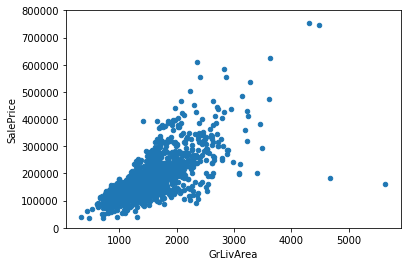

In [7]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

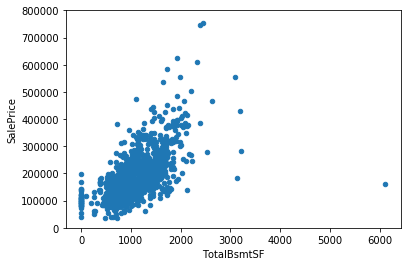

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

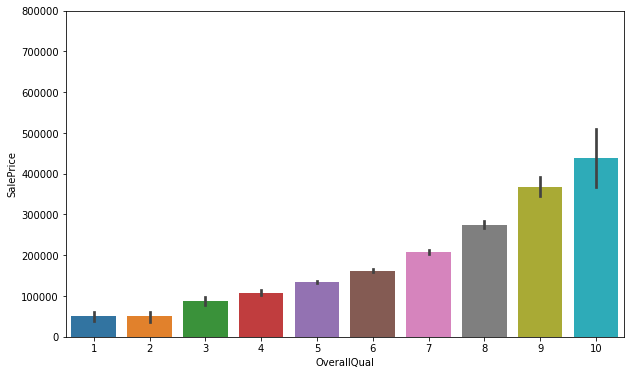

In [10]:
#lets visualise overallqual vs saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.barplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

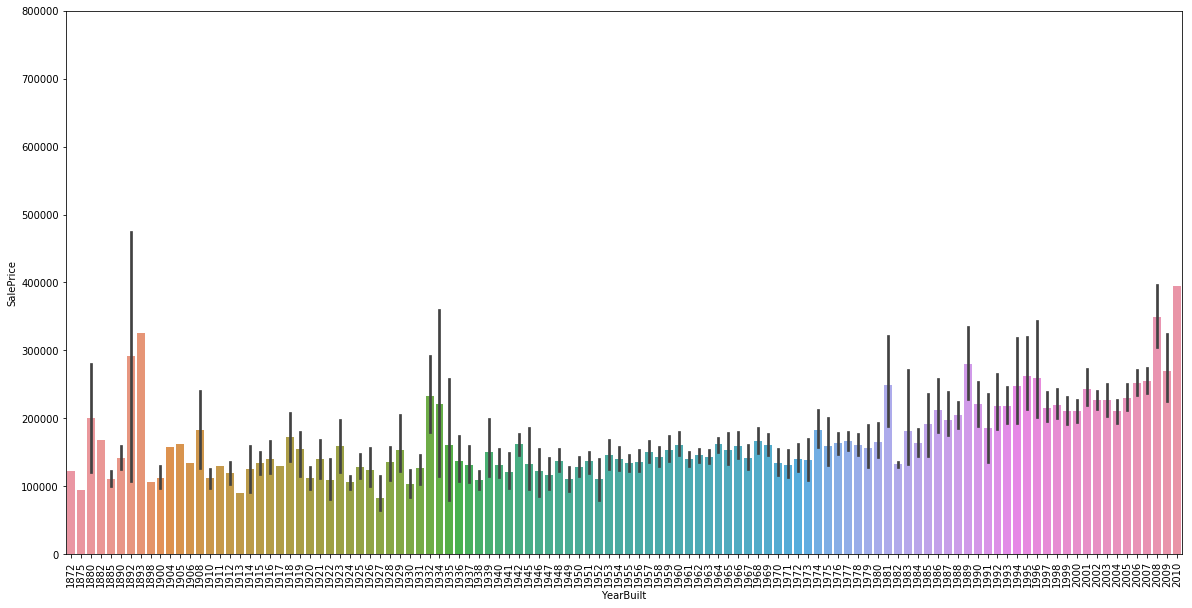

In [12]:
#lets visualise barplot of year built vs saleprice
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.barplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

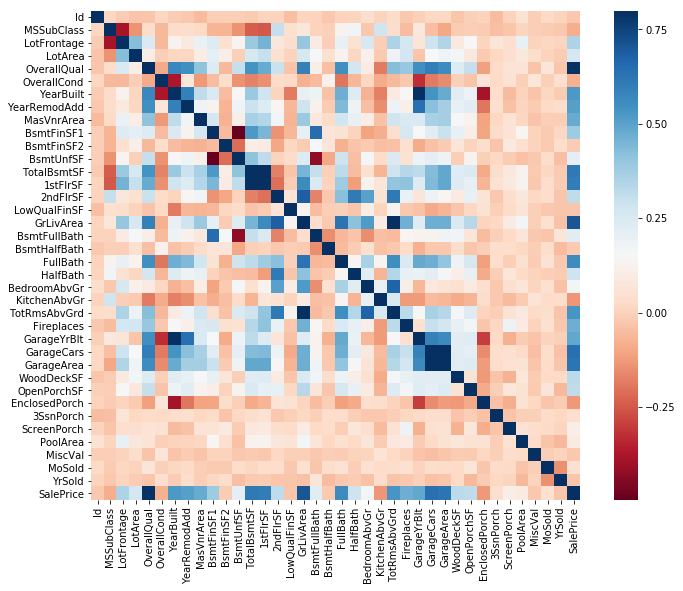

In [18]:
#now the correlation matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="RdBu", vmax=.8, square=True);

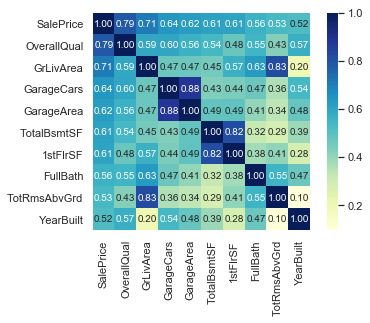

In [27]:
#Let's check correlation of our target with other 12 features
f = 10 
cols = corrmat.nlargest(f, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

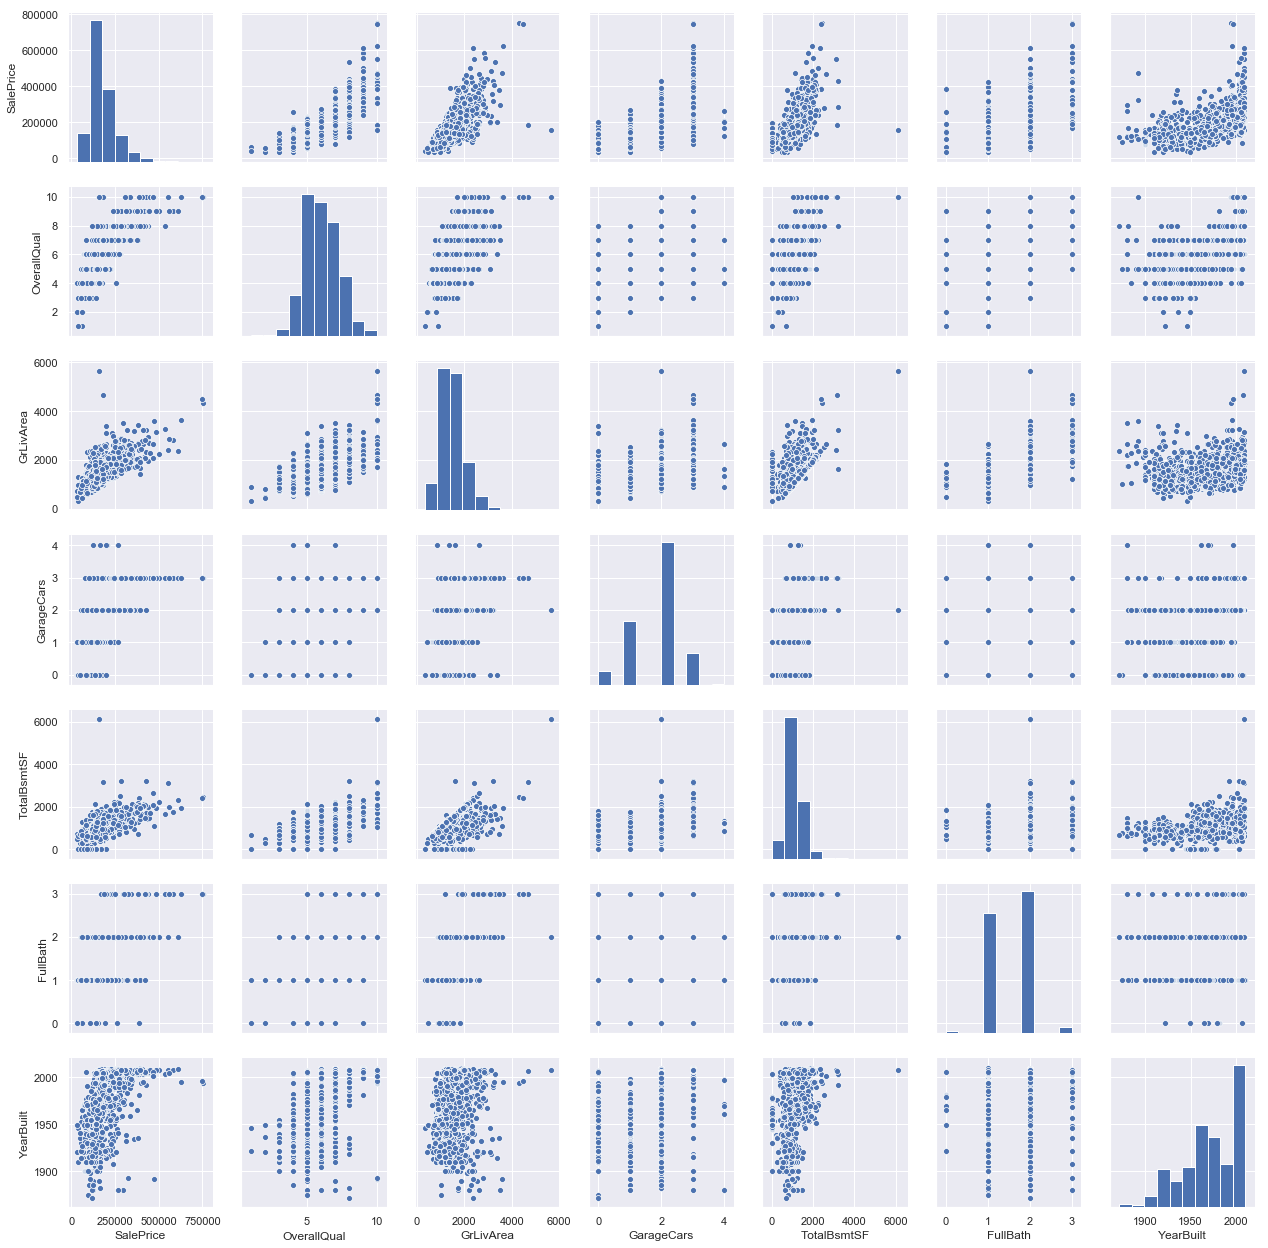

In [29]:
#now the whole visualization of data via scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], height = 2.5)
plt.show();

In [31]:
#lets check for null vlues now
tot_na = house.isnull().sum().sort_values(ascending=False)
p = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
na_data = pd.concat([tot_na, p], axis=1, keys=['Total_null', 'Percentage(%)'])
na_data.head()

,Total_null,Percentage(%)
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [32]:
#According to the data dictionary, these variables have "NaN" but which does not mean null value, 
#so lets gather them in a list first in order to avoid confusion
nan_not_as_null = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", 
                    "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType",
                    "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [33]:
#now lets not drop the nan values of the above listed variables and replace them with "None"
for n in nan_not_as_null:
    house[n].fillna("None", inplace=True)
    house[n].fillna("None", inplace=True)

In [34]:
#Now there are also real Nan values(numerical) which needs to either dropped or the best way is to fill them with
#the mean or median value. Here i have replaced the null values with the median, for that we need a library called Imputer

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [35]:
#lets check for numerical null vlues now
tot_na = house.isnull().sum().sort_values(ascending=False)
p = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
na_data = pd.concat([tot_na, p], axis=1, keys=['Total_null', 'Percentage(%)'])
na_data.head()

,Total_null,Percentage(%)
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [36]:
#for the time being we check for the variables having significantly high null values and we drop them one by one 
#unless its necessary

#lets drop "LotFrontage" which as too many null values 

house.drop("LotFrontage", axis=1, inplace=True)

In [37]:
#lets check for numerical null vlues now
tot_na = house.isnull().sum().sort_values(ascending=False)
p = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
na_data = pd.concat([tot_na, p], axis=1, keys=['Total_null', 'Percentage(%)'])
na_data.head()

,Total_null,Percentage(%)
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000


In [38]:
#MasVnrType is categorical value according to data dictionary so let's replace the missing values with "None". 

house["MasVnrType"].fillna("None", inplace=True)

#Also compared to the amount of data initially given "GarageYrBlt" & MasVnrArea have significantly 
#lower null values so dropping them won't be a good idea. Instead lets replace the null values with median

house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)

In [39]:
#lets check for numerical null vlues now
tot_na = house.isnull().sum().sort_values(ascending=False)
p = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
na_data = pd.concat([tot_na, p], axis=1, keys=['Total_null', 'Percentage(%)'])
na_data.head()

,Total_null,Percentage(%)
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [40]:
#only Electrical has lower null value percentage now, so dets drop the null values
house.dropna(inplace=True)

In [41]:
#lets check for numerical null vlues now
tot_na = house.isnull().sum().sort_values(ascending=False)
p = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
na_data = pd.concat([tot_na, p], axis=1, keys=['Total_null', 'Percentage(%)'])
na_data.head()

,Total_null,Percentage(%)
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [43]:
#since there are two types of data types in our training data set, so chances are there to get confused which one is what, 
#so lets distinguish them and seperate them in two parts


types = house.dtypes 
num = types[(types == 'int64') | (types == float)] #numerical values 
cat = types[types == object] #categorical values 

In [44]:
#Lets enlist the two types of data 
num_val = list(num.index)
cat_val = list(cat.index)

In [45]:
#here are the categorical datatypes
print(cat_val)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
#here are the numerical datatypes
print(num_val)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


## Feature Engineering 

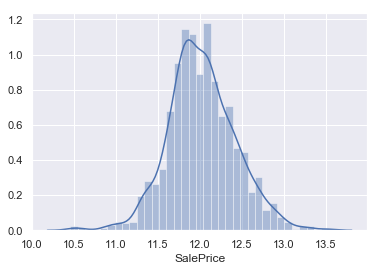

In [47]:
#we had earlier seen that, the distplot of sales price was kind of skewed, but on taking logarithm, 
#its helping us in normalizing the data points

sns.distplot(np.log(house["SalePrice"]))

In [48]:
#In order to normalize stuffs, lets take log of sale price and update it in new form
house["UpdatedPrice"] = np.log(house["SalePrice"])

In [50]:
#lets apply the updated form in all the categorical values 

for i in cat_val:
    f_set = set(house[i])
    for j in f_set:
        f_list = list(f_set)
        house.loc[house[i] == j, i] = f_list.index(j)

In [51]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,UpdatedPrice
0,1,60,1,8450,0,0,1,2,0,3,...,1,0,0,0,2,2008,0,3,208500,12.247694
1,2,20,1,9600,0,0,1,2,0,4,...,1,0,0,0,5,2007,0,3,181500,12.109011
2,3,60,1,11250,0,0,0,2,0,3,...,1,0,0,0,9,2008,0,3,223500,12.317167
3,4,70,1,9550,0,0,0,2,0,2,...,1,0,0,0,2,2006,0,2,140000,11.849398
4,5,60,1,14260,0,0,0,2,0,4,...,1,0,0,0,12,2008,0,3,250000,12.429216


## Model building process

In [52]:
X = house.drop(["Id", "SalePrice", "UpdatedPrice"], axis=1).values
y = house["UpdatedPrice"].values

# split into train and test as usual
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#tuning alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}




C:\Users\ANIK\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
#importing libraries for Ridge and Lasso techniques

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [54]:
#lasso regression
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [55]:
#lets check lasso result
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092042,0.098712,0.003216,0.006431,0.0001,{'alpha': 0.0001},-0.085072,-0.095484,-0.103585,-0.094940,...,-0.094305,0.005945,1,-0.084847,-0.081665,-0.075051,-0.084024,-0.082373,-0.081592,0.003461
1,0.018127,0.009856,0.000000,0.000000,0.001,{'alpha': 0.001},-0.091394,-0.102546,-0.108335,-0.095580,...,-0.098218,0.006311,2,-0.091090,-0.088555,-0.080745,-0.084755,-0.090060,-0.087041,0.003812
2,0.004034,0.004225,0.000000,0.000000,0.01,{'alpha': 0.01},-0.097244,-0.103238,-0.108233,-0.097276,...,-0.099179,0.006188,3,-0.096547,-0.093608,-0.088500,-0.088003,-0.095136,-0.092359,0.003484
3,0.029385,0.005765,0.000000,0.000000,0.05,{'alpha': 0.05},-0.100489,-0.112560,-0.121860,-0.115151,...,-0.109900,0.008658,4,-0.107098,-0.104638,-0.100497,-0.102102,-0.106583,-0.104184,0.002545
4,0.030614,0.013966,0.000000,0.000000,0.1,{'alpha': 0.1},-0.103100,-0.120276,-0.127380,-0.120169,...,-0.115502,0.009146,5,-0.114204,-0.110273,-0.104862,-0.105465,-0.112831,-0.109527,0.003785


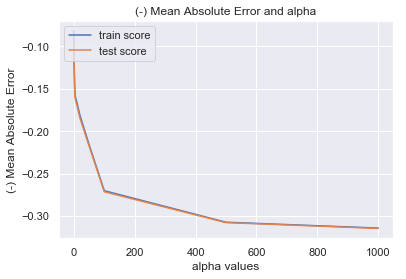

In [56]:
#lets plot the lasso regression
cv_res['param_alpha'] = cv_res['param_alpha'].astype('float32')

# plotting
plt.plot(cv_res['param_alpha'], cv_res['mean_train_score'])
plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'])
plt.xlabel('alpha values')
plt.ylabel('(-) Mean Absolute Error')

plt.title("(-) Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
#alpha at 50 or 100 seems to be a good one 

alpha = 50

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
#lets check the lasso coefficients
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.02426915e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [59]:
#Ridge regression

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [60]:
#ridge results
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res = cv_res[cv_res['param_alpha']<=200]
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128734,0.249728,0.0,0.0,0.0001,{'alpha': 0.0001},-0.084834,-0.095530,-0.103259,-0.099707,...,-0.095222,0.006305,5,-0.084458,-0.081092,-0.074752,-0.083874,-0.082102,-0.081256,0.003468
1,0.003125,0.006251,0.0,0.0,0.001,{'alpha': 0.001},-0.084848,-0.095521,-0.103258,-0.099342,...,-0.095151,0.006249,4,-0.084472,-0.081112,-0.074758,-0.083883,-0.082115,-0.081268,0.003471
2,0.006248,0.007652,0.0,0.0,0.01,{'alpha': 0.01},-0.084983,-0.095460,-0.103304,-0.097485,...,-0.094817,0.006004,2,-0.084602,-0.081321,-0.074823,-0.083932,-0.082240,-0.081384,0.003482
3,0.001302,0.002604,0.0,0.0,0.05,{'alpha': 0.05},-0.085603,-0.095402,-0.103534,-0.095955,...,-0.094725,0.005752,1,-0.085125,-0.082145,-0.075172,-0.083981,-0.082825,-0.081850,0.003490
4,0.006250,0.007654,0.0,0.0,0.1,{'alpha': 0.1},-0.086358,-0.095459,-0.103780,-0.095600,...,-0.094926,0.005566,3,-0.085661,-0.082932,-0.075637,-0.083999,-0.083496,-0.082345,0.003476


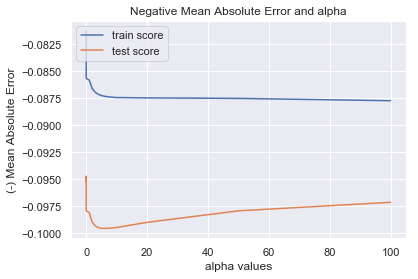

In [61]:
#now lets plot the ridge regression
cv_res['param_alpha'] = cv_res['param_alpha'].astype('int32')

# plotting
plt.plot(cv_res['param_alpha'], cv_res['mean_train_score'])
plt.plot(cv_res['param_alpha'], cv_res['mean_test_score'])
plt.xlabel('alpha values')
plt.ylabel('(-) Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
#lets check the ridge coefficients
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.78881407e-04, -1.65605476e-02,  1.81475810e-06, -6.40362978e-02,
        1.24237222e-02, -1.08555097e-02,  4.04280675e-03, -2.05515425e-02,
       -1.68869790e-02,  1.79784254e-02,  3.57841063e-03,  1.45127783e-02,
        9.03791469e-03, -1.63322796e-02,  1.14700557e-03,  7.01327300e-02,
        4.71503436e-02,  2.25513219e-03,  9.71426623e-04,  2.99283435e-02,
       -6.08081999e-02,  3.32997531e-03,  2.82458121e-04,  2.62234283e-03,
        2.65984946e-05, -1.77665778e-02,  8.89306850e-03,  1.50381355e-02,
        1.01628688e-02,  4.76475923e-03, -1.06528937e-02, -5.68480912e-03,
        2.43531912e-05,  5.38576723e-03,  3.31352777e-05, -2.37489526e-06,
        5.51135772e-05,  1.71596910e-02,  7.82021474e-03,  3.77841367e-02,
       -4.16712450e-04,  5.50380130e-05,  3.87496151e-05,  5.99816951e-05,
        1.53769320e-04,  6.18354490e-02,  3.15822048e-02,  4.22680155e-02,
        1.47756484e-02, -2.72366339e-03, -6.43376475e-02,  1.14381186e-02,
        1.21793166e-02, -

#### we clearly see that Lasso makes our life more easier than Ridge regression in terms of model building as well as feature selection